In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from lazypredict.Supervised import LazyRegressor 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
salarios =  pd.read_csv('data/salaries_data.csv')
testeo =  pd.read_csv('data/testeo.csv')
muestra = pd.read_csv('data/muestra.csv')

In [3]:
salarios.shape

(500, 11)

In [4]:
testeo.shape

(107, 8)

In [5]:
salaries = salarios.salary_in_usd

In [6]:
salarios.drop(columns = ['salary', 'salary_currency', 'salary_in_usd'], inplace = True)

In [7]:
salarios.info(), testeo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           500 non-null    int64 
 1   experience_level    500 non-null    object
 2   employment_type     500 non-null    object
 3   job_title           500 non-null    object
 4   employee_residence  500 non-null    object
 5   remote_ratio        500 non-null    int64 
 6   company_location    500 non-null    object
 7   company_size        500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           107 non-null    int64 
 1   experience_level    107 non-null    object
 2   employment_type     107 non-null    object
 3   job_title       

(None, None)

In [8]:
concat = pd.concat([salarios, testeo])

In [9]:
concat.experience_level.value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

Siginifcado de cada variable y número asignado a cada una:

+ EN: entry level -> 1
+ MI: mid - senior -> 2
+ SE: senior -> 3
+ EX: executive -> 4

In [10]:
exp_level = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
experience_level = []
for e in concat.experience_level:
    if e in exp_level:
        experience_level.append(exp_level[e])

In [11]:
concat['experience_level'] = experience_level

In [12]:
concat.employment_type.value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

Siginifcado de cada variable y número asignado a cada una:

+ FT: full-time -> 4
+ PT: part-time -> 3
+ CT: contract -> 2
+ FL: freelance -> 1

In [13]:
emp_type = {'FL': 1, 'CT': 2, 'PT': 3, 'FT': 4}
employment_type = []
for e in concat.employment_type:
    if e in emp_type:
        employment_type.append(emp_type[e])

In [14]:
concat['employment_type'] = employment_type

In [15]:
concat.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2022,3,4,Data Engineer,US,100,US,M
1,2022,3,4,Data Engineer,US,100,US,M
2,2021,2,4,BI Data Analyst,US,100,US,M
3,2021,2,2,ML Engineer,US,100,US,L
4,2021,2,4,Data Engineer,RO,0,US,L


In [16]:
concat.shape

(607, 8)

In [17]:
dictio = dict(concat.job_title.value_counts().head(11))

In [18]:
lst = list(dictio.keys())

In [19]:
job_title = []

for e in concat.job_title:
    if e not in lst:
        job_title.append('Other')
    elif e in lst:
        job_title.append(e)
    else: continue

In [20]:
numeric_job = {'Data Scientist': 12, 'Data Engineer': 11, 'Data Analyst': 10, 'Machine Learning Engineer': 9,
              'Research Scientist': 8, 'Data Science Manager': 7, 'Data Architect': 6, 'Big Data Engineer': 5,
               'Machine Learning Scientist': 4, 'Director of Data Science': 3, 'AI Scientist': 2, 'Other': 1}
defin = []

for e in job_title:
    if e in numeric_job:
        defin.append(numeric_job[e])

In [21]:
concat['job_title'] = defin

In [22]:
concat.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2022,3,4,11,US,100,US,M
1,2022,3,4,11,US,100,US,M
2,2021,2,4,1,US,100,US,M
3,2021,2,2,1,US,100,US,L
4,2021,2,4,11,RO,0,US,L


In [23]:
concat.company_size.value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

En función del tamaño de la empresa, se ha asignado un número:
+ L: 3
+ M: 2
+ S: 1

In [24]:
comp_size = {'L': 3, 'M': 2, 'S': 1}
company_size = []
for e in concat.company_size:
    if e in comp_size:
        company_size.append(comp_size[e])

concat['company_size'] = company_size

In [25]:
concat.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2022,3,4,11,US,100,US,2
1,2022,3,4,11,US,100,US,2
2,2021,2,4,1,US,100,US,2
3,2021,2,2,1,US,100,US,3
4,2021,2,4,11,RO,0,US,3


In [26]:
len(concat.company_location.value_counts())

50

In [27]:
le = LabelEncoder()

In [28]:
concat['company_location'] = le.fit_transform(concat.company_location)

In [29]:
concat['employee_residence'] = le.fit_transform(concat.employee_residence)

In [30]:
sal = concat.iloc[:500, :]
test = concat.iloc[500:, :]

In [31]:
sal['salaries'] = salaries

In [32]:
sal.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salaries
0,2022,3,4,11,55,100,48,2,140250
1,2022,3,4,11,55,100,48,2,135000
2,2021,2,4,1,55,100,48,2,100000
3,2021,2,2,1,55,100,48,3,270000
4,2021,2,4,11,47,0,48,3,26005


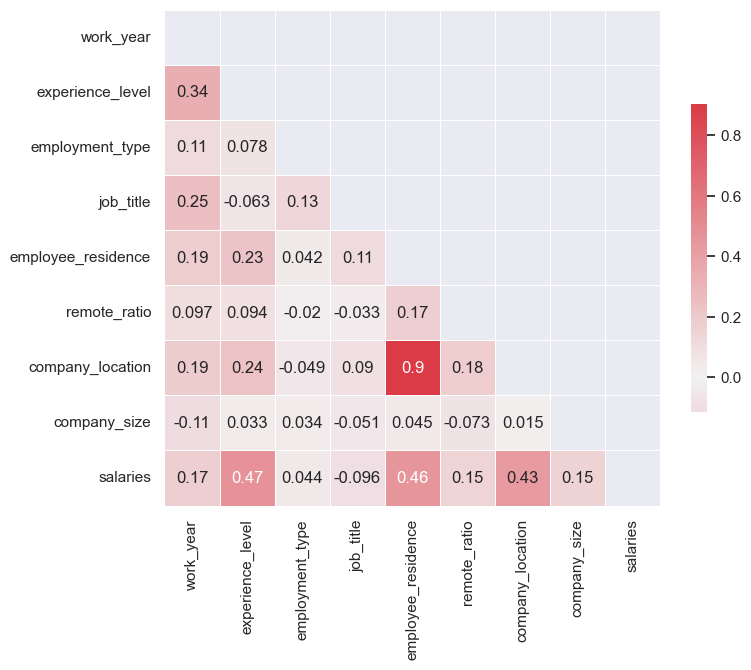

In [33]:
plt.figure(figsize=(8, 8))

sns.set(style='darkgrid')

mask=np.triu(np.ones_like(sal.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(sal.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [34]:
# Eliminamos la columna 'employee_residence' debido a su alta correlación con company_location: una explica a la otra.

sal.drop(columns = ['employee_residence'], inplace = True)
test.drop(columns = ['employee_residence'], inplace = True)

### Utilizamos LazyRegressor() para saber cuál es el modelo de Machine Learning que mejor nos puede funcionar a la hora de predecir los salarios

In [35]:
X = sal.drop(columns = ['salaries'])

y = sal.salaries

In [36]:
X_train, X_test, y_train, y_test = tts(X, y, train_size = 0.8)

In [37]:
lazy=LazyRegressor()

In [38]:
lazy.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:03<00:00, 11.18it/s]


(                               Adjusted R-Squared  R-Squared      RMSE  \
 Model                                                                    
 HistGradientBoostingRegressor                0.40       0.44  61168.20   
 RandomForestRegressor                        0.39       0.44  61371.83   
 BaggingRegressor                             0.34       0.39  63822.19   
 LGBMRegressor                                0.34       0.38  64162.47   
 GradientBoostingRegressor                    0.33       0.38  64357.60   
 XGBRegressor                                 0.32       0.37  64714.22   
 AdaBoostRegressor                            0.32       0.37  64866.80   
 DecisionTreeRegressor                        0.27       0.33  67069.69   
 ExtraTreesRegressor                          0.27       0.32  67131.91   
 KNeighborsRegressor                          0.23       0.29  68970.07   
 OrthogonalMatchingPursuitCV                  0.23       0.28  69203.57   
 LassoLarsIC             

In [39]:
#help(GradientBoostingRegressor.fit)

In [59]:
GBR = GradientBoostingRegressor()

In [60]:
GBR.fit(X, y)

GradientBoostingRegressor()

In [61]:
pred = GBR.predict(test)

In [62]:
muestra['salary_in_usd'] = pred

In [63]:
muestra.to_csv('prediction_models/muestra(GBR).csv', index = False)

In [64]:
XGBR = XGBRegressor()

In [65]:
XGBR.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [66]:
pred2 = XGBR.predict(test)

In [67]:
muestra['salary_in_usd'] = pred2

In [68]:
muestra.to_csv('prediction_models/muestra(XGBR).csv', index = False)

In [69]:
RFR = RandomForestRegressor()

In [70]:
RFR.fit(X, y)

RandomForestRegressor()

In [71]:
pred3 = RFR.predict(test)

In [72]:
muestra['salary_in_usd'] = pred3

In [73]:
muestra.to_csv('prediction_models/muestra(RFR).csv', index = False)